Librerias

In [65]:
#Manejo de datos 
import pandas as pd
import numpy as np



#Gráficas
import seaborn as sns
import matplotlib.pyplot as plt

#Modelos
from  scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

Carga de insumos y exploración inicial

In [3]:
#Cargad e insumos
auto_df = pd.read_csv('upgradeddb.csv')

C:\Users\León\AppData\Local\Temp\ipykernel_20632\432284243.py:2: DtypeWarning: Columns (127) have mixed types. Specify dtype option on import or set low_memory=False.
  auto_df = pd.read_csv('upgradeddb.csv')


In [4]:
# Descripción general
print("El dataset cuenta con \033[1m{} renglones\033[0m y \033[1m{} columnas\033[0m \n".format(auto_df.shape[0], auto_df.shape[1]))
auto_df.isnull().sum()

El dataset cuenta con 96374 renglones y 138 columnas 



Unnamed: 0                   0
account_id                   0
customer                     0
opening_da                   0
loan_type                    0
                         ...  
cve_umun                     0
n_charge_stations        37056
in_centro_urbano             0
in_zona urbana               0
in_zona_metropolitana        0
Length: 138, dtype: int64

In [10]:
auto_df[['antigüedad','cred_limit','antigüedad','edad_momen']].describe()

,antigüedad,cred_limit,antigüedad,edad_momen
count,96374.000000,4.123700e+04,96374.000000,96370.000000
mean,10.999292,1.078769e+05,10.999292,43.403033
std,8.179960,1.599848e+05,8.179960,12.989597
min,0.000000,1.500000e+02,0.000000,2.171116
25%,3.720739,2.600000e+04,3.720739,32.558522
50%,10.672142,5.575000e+04,10.672142,41.949350
75%,16.758385,1.230000e+05,16.758385,53.466804
max,49.976728,6.100000e+06,49.976728,121.557837


<Axes: xlabel='credito_ve', ylabel='antigüedad'>

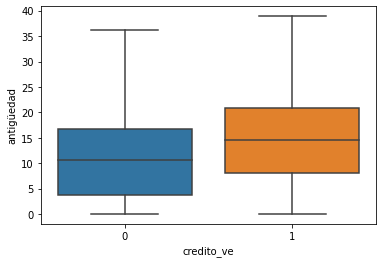

In [99]:
sns.boxplot(auto_df, y="antigüedad", x="credito_ve",showfliers = False)

<Axes: xlabel='credito_ve', ylabel='cred_limit'>

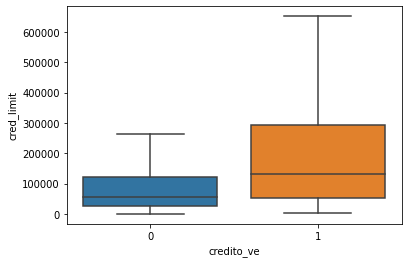

In [100]:

sns.boxplot(auto_df, y="cred_limit", x="credito_ve",showfliers = False)

<Axes: xlabel='credito_ve', ylabel='avg_balanc'>

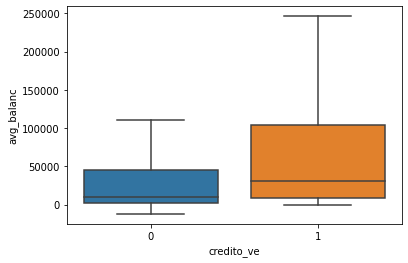

In [101]:
sns.boxplot(auto_df, y="avg_balanc", x="credito_ve",showfliers = False)

<Axes: xlabel='credito_ve', ylabel='n_charge_stations'>

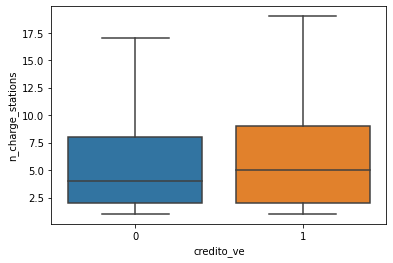

In [102]:

sns.boxplot(auto_df, y="n_charge_stations", x="credito_ve",showfliers = False)

<Axes: xlabel='credito_ve', ylabel='edad_momen'>

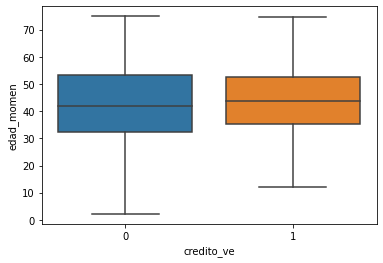

In [103]:
sns.boxplot(auto_df, y="edad_momen", x="credito_ve",showfliers = False)


<Axes: xlabel='credito_ve', ylabel='saving_cap'>

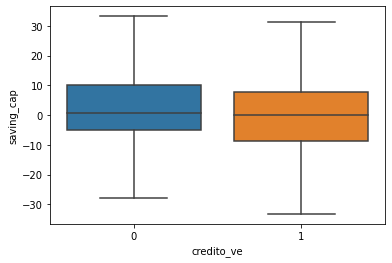

In [104]:

sns.boxplot(auto_df, y="saving_cap", x="credito_ve",showfliers = False)

<Axes: xlabel='credito_ve', ylabel='liquidity_'>

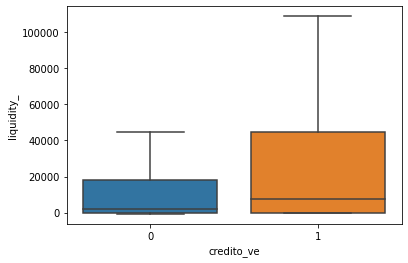

In [105]:

sns.boxplot(auto_df, y="liquidity_", x="credito_ve",showfliers = False)

Prueba de hipotesis

In [41]:
#Separar base de datos en dos grupos por la variable credito verde
groups = auto_df.groupby(auto_df.credito_ve)
no_v_df = groups.get_group(0)
v_df=groups.get_group(1)

In [42]:
#Selecion de columna de interes
no_v_df=no_v_df["n_charge_stations"]
v_df=v_df["n_charge_stations"]


In [43]:
#Quitamos valores nulos
no_v_df=no_v_df.dropna()
v_df=v_df.dropna()


In [44]:
#Para la prueba de hipotesis requerimos que ambos df tengan el mismo tamaño por lo que hacemos una muestra aleatoria sobre los registros
#que no indican tener un credito verde
no_v_df_sample=no_v_df.sample(n=643, replace=True)

In [45]:
stats.shapiro(no_v_df_sample)

ShapiroResult(statistic=0.7900252938270569, pvalue=5.679117219873458e-28)

In [46]:
stats.shapiro(v_df)

ShapiroResult(statistic=0.8283781409263611, pvalue=1.103678898979031e-25)

In [47]:
#p-valae <0.05 
#con la hipotesis nnula de que son inguales nos hace rechazar 
stats.wilcoxon(no_v_df_sample, v_df)

WilcoxonResult(statistic=69932.5, pvalue=0.0004908124994892646)

Regresión logistica

In [216]:
#columnas de interes
#seleciónamos "cred_limit" ya que en la sección de exploración vimos que las medias no se cruzan por lo que puede ser buen predictor
logit_df =auto_df[["n_charge_stations","cred_limit","credito_ve",'avg_balanc','antigüedad','edad_momen','saving_cap']].dropna()



In [217]:
logit_df['credito_ve'].value_counts()

0    23539
1      316
Name: credito_ve, dtype: int64

In [218]:

# Generar una columna de números aleatorios
num_aleatorios = np.random.random(size=len(logit_df))

# Agregar la columna de números aleatorios al DataFrame
logit_df['Numeros Aleatorios'] = num_aleatorios

logit_df

,n_charge_stations,cred_limit,credito_ve,avg_balanc,antigüedad,edad_momen,saving_cap,Numeros Aleatorios
22,1.0,15795.00,0,850.06,13.828884,29.883641,-6.114102,0.665816
28,1.0,77400.00,0,647.76,14.160164,46.387406,-23.740175,0.638742
30,1.0,48300.00,0,2310.94,4.618754,26.940452,9.258851,0.680502
31,1.0,38782.56,0,1726.78,12.917180,39.734428,-1.487070,0.927397
32,1.0,26000.00,0,27609.97,12.117728,59.386721,-269.769139,0.887410
...,...,...,...,...,...,...,...,...
95855,1.0,111200.00,0,7284.83,4.082136,29.119781,23.600717,0.929410
95856,1.0,5400.00,0,12807.81,3.340178,28.377823,26.233276,0.406460
96108,1.0,188100.00,0,21471.21,20.062971,41.730322,-6.440134,0.014343
96109,1.0,111400.00,0,27385.61,15.597536,33.316906,-2.739187,0.330226


In [219]:
condicion1 = logit_df['Numeros Aleatorios'] > .95
condicion2 = logit_df['credito_ve'] ==1
logit_df= logit_df[condicion1 | condicion2]


In [220]:
logit_df['credito_ve'].value_counts()

0    1118
1     316
Name: credito_ve, dtype: int64

In [221]:
logit_df=logit_df[["n_charge_stations","cred_limit","credito_ve",'avg_balanc','antigüedad','edad_momen','saving_cap']]

In [222]:
X = logit_df.drop(columns = 'credito_ve')
y =logit_df['credito_ve']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [223]:
#X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.491632
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1147
Model:                          Logit   Df Residuals:                     1141
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                 0.06432
Time:                        08:56:17   Log-Likelihood:                -563.90
converged:                       True   LL-Null:                       -602.66
Covariance Type:            nonrobust   LLR p-value:                 2.767e-15
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
n_charge_stations    -0.0238      0.012     -2.018      0.044      -0.047      -0.001
cred_lim

In [224]:
#X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")




El accuracy de test es: 81.53310104529616%


In [225]:
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,217,5
1,48,17


In [226]:
logit_df=logit_df[["n_charge_stations","credito_ve",'antigüedad','edad_momen','saving_cap']]
X = logit_df.drop(columns = 'credito_ve')
y =logit_df['credito_ve']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
#X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.523446
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1147
Model:                          Logit   Df Residuals:                     1143
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                0.003767
Time:                        08:57:30   Log-Likelihood:                -600.39
converged:                       True   LL-Null:                       -602.66
Covariance Type:            nonrobust   LLR p-value:                    0.2087
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
n_charge_stations    -0.0161      0.011     -1.423      0.155      -0.038       0.006
antigüed

In [227]:
#X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")



El accuracy de test es: 77.35191637630662%


In [228]:
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,221,1
1,64,1
